In [1]:
import requests
import datetime
from datetime import timedelta
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

In [2]:
%matplotlib inline

In [3]:
i = datetime.datetime.now()

In [4]:
# start_date
year = 2010
day = "%02d" % 1

# present year
current_year = i.year

In [5]:
json_data = {}

In [6]:
while year <= current_year:
    if year == current_year:
        month_end = i.month
    else:
        month_end = 12
        
    for month in range(1, month_end+1):             
        # Format: 2001-01-03 (YYYY-MM-DD)
        today = str(year) + "-" + str("%02d" % month) + "-" + str(day)
        
        # Sample: http://api.fixer.io/2001-02-12?base=EUR
        url = "http://api.fixer.io/" + today + "?base=EUR"
        r = requests.get(url)
        data = r.json()

        json_data[today] = data["rates"]
    year += 1

In [7]:
json_data = json.dumps(json_data)
df = pd.read_json(json_data)

In [8]:
df = df.T

In [9]:
df.to_csv("currency_data.csv")

In [10]:
currency_data = pd.read_csv("currency_data.csv", index_col = 0)
currency_data.index.names = ['Dates']

In [11]:
null_count = currency_data.isnull().sum()

In [12]:
for currency in null_count.iteritems():
    if(currency[1] != 0):
        null_currency = currency[0]
        currency_data[null_currency] = currency_data[null_currency].fillna(0)

In [13]:
currencies = currency_data.columns

In [14]:
currency_data.to_csv("currency_data.csv")

In [15]:
currency_data = pd.read_csv("currency_data.csv", parse_dates = [0], index_col = 0)

In [84]:
# del df['column_name']
for currency in currencies:
    curr_mean = (currency_data[currency].mean())
    if curr_mean > 100:
        del currency_data[currency]

In [85]:
# Tabular representaion
currency_data

,AUD,BGN,BRL,CAD,CHF,CNY,CZK,DKK,EEK,GBP,...,PHP,PLN,RON,RUB,SEK,SGD,THB,TRY,USD,ZAR
Dates,,,,,,,,,,,,,,,,,,,,,
2010-01-01,1.6008,1.9558,2.5113,1.5128,1.4836,9.8350,26.473,7.4418,15.647,0.88810,...,66.507,4.1045,4.2363,43.154,10.2520,2.0194,47.986,2.1547,1.4406,10.6660
2010-02-01,1.5748,1.9558,2.6120,1.4868,1.4725,9.4990,26.065,7.4454,15.647,0.87485,...,64.871,4.0045,4.0863,42.251,10.1420,1.9650,46.177,2.0745,1.3913,10.5340
2010-03-01,1.5105,1.9558,2.4471,1.4266,1.4644,9.2326,25.933,7.4427,15.647,0.90670,...,62.379,3.9400,4.1110,40.547,9.7649,1.9026,44.474,2.0879,1.3525,10.3910
2010-04-01,1.4685,1.9558,2.3953,1.3622,1.4179,9.1937,25.385,7.4448,15.647,0.88485,...,60.838,3.8458,4.1081,39.598,9.7288,1.8826,43.609,2.0481,1.3468,9.8023
2010-05-01,1.4292,1.9558,2.2959,1.3379,1.4341,9.0878,25.527,7.4425,15.647,0.87030,...,59.188,3.9163,4.1300,38.839,9.6217,1.8217,43.081,1.9757,1.3315,9.7628
2010-06-01,1.4595,1.9558,2.2262,1.2766,1.4183,8.3021,25.628,7.4393,15.647,0.83470,...,56.709,4.1140,4.1868,38.029,9.6163,1.7193,39.607,1.9288,1.2155,9.3929
2010-07-01,1.4753,1.9558,2.2337,1.3124,1.3178,8.3596,25.770,7.4487,15.647,0.82215,...,57.301,4.1770,4.3442,38.581,9.6018,1.7225,39.967,1.9552,1.2328,9.5845
2010-08-01,1.4466,1.9558,2.2924,1.3454,1.3541,8.8265,24.777,7.4510,15.647,0.83490,...,59.343,4.0085,4.2508,39.417,9.4333,1.7733,42.048,1.9703,1.3028,9.5616
2010-09-01,1.4141,1.9558,2.2369,1.3560,1.2967,8.7187,24.735,7.4446,15.647,0.83105,...,57.740,3.9896,4.2648,39.357,9.3490,1.7277,39.903,1.9485,1.2800,9.4195


In [63]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

In [73]:
dates = currency_data.index.values

In [65]:
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)

In [103]:
# plt.figure(figsize=(20, 14))
plt.figure(figsize=(4, 5), dpi=100)

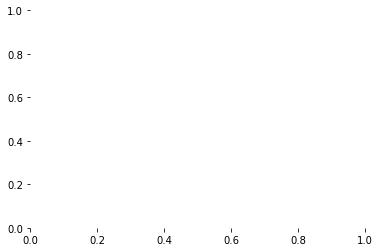

In [67]:
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

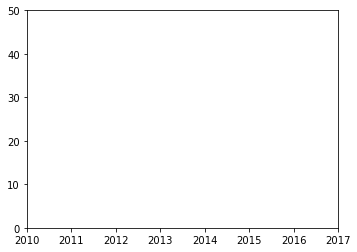

In [106]:
plt.ylim(0, 50)
plt.xlim(2010, current_year)
plt.subplots_adjust(left=0.18)

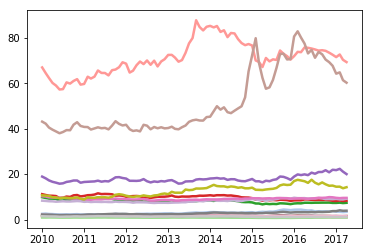

In [107]:
fam = ["USD", "EUR", "JPY", "GBP", "AUD", "CAD", "CHF", "CNY", "SEK", "NZD", "MXN", "SGD", "HKD", "NOK", "KRW", "TRY", "RUB", "INR", "BRL", "ZAR"]
rank = 0
for curr in currency_data.columns:
    if curr in fam:
        plt.plot(dates, currency_data[curr], lw=2.5, color=tableau20[rank])
        rank += 1